In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

In [2]:
df = pd.read_csv('IBM Attrition Data.csv')

df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [3]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df[['Attrition', 'Department','EducationField', 'MaritalStatus']] = enc.fit_transform(df[['Attrition', 'Department','EducationField', 'MaritalStatus']]).astype(int)

df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,1,2,4,2,5993,8,1,6
1,49,0,1,8,1,1,3,2,1,5130,1,3,10
2,37,1,1,2,2,4,4,3,2,2090,6,3,0
3,33,0,1,3,4,1,4,3,1,2909,1,3,8
4,27,0,1,2,1,3,1,2,1,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,23,2,3,3,4,1,2571,4,3,5
1466,39,0,1,6,1,3,4,1,1,9991,4,3,7
1467,27,0,1,4,3,1,2,2,1,6142,1,3,6
1468,49,0,2,2,3,3,4,2,1,5390,2,2,9


## Question 1: Find the age distribution of employees in IBM

Text(0.5, 0, 'Age')

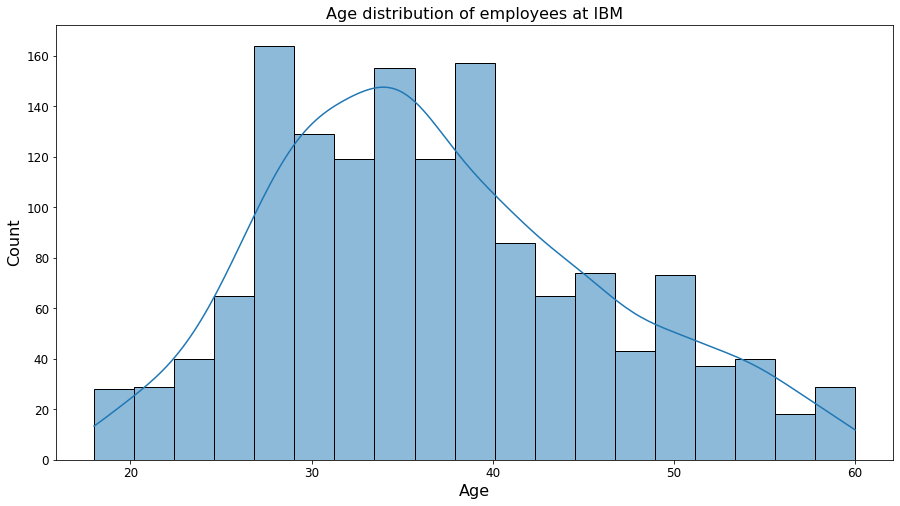

In [4]:
figure(figsize = (15,8))
plt.title('Age distribution of employees at IBM',fontsize = 16)
sns.histplot(x = 'Age', data = df, kde = True)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylabel('Count',fontsize = 16)
plt.xlabel('Age', fontsize = 16)

Most employees at IBM are at age 29-40 and there is almost normal distribution of age in this data

## Question 2: Explore attrition by age

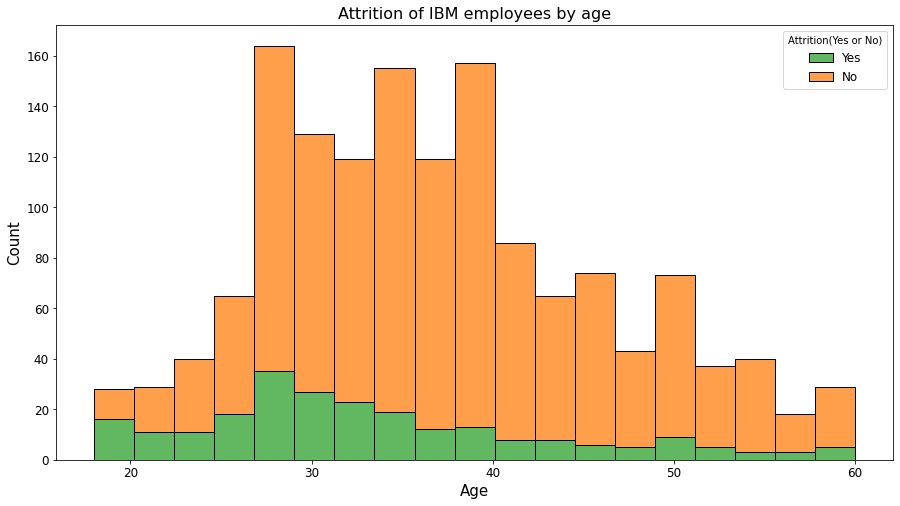

In [5]:
figure(figsize = (15,8))
plt.title('Attrition of IBM employees by age', fontsize = 16)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=12)
sns.histplot(data = df,x = 'Age', hue = 'Attrition',palette=["C1", "C2"],multiple="stack")
plt.legend( ['Yes', 'No'],title = 'Attrition(Yes or No)',fontsize = 12)

## Question 3: Explore data for left employees

In [6]:
left = df[df['Attrition'] == 1]

In [7]:
df3 = left.mean(axis = 0)[['MonthlyIncome','YearsAtCompany','NumCompaniesWorked','JobSatisfaction','WorkLifeBalance']].reset_index()

df3.columns = ['Info','value']

df3

,Info,value
0,MonthlyIncome,4787.092827
1,YearsAtCompany,5.130802
2,NumCompaniesWorked,2.940928
3,JobSatisfaction,2.468354
4,WorkLifeBalance,2.658228


The informations on the people that left:
* Average monthly income of 4787
* Average years at company is 5 years
* Average numbers of companies worked is approximately 3 years
* Average Job Satisfaction score is 2(Good)
* Average Work Life Balance score is 2 (Medium)

The average income of people that left is fairly high. However, their average job satisfaction and work life balance score is alarmingly low even though the average time they work at the company is 5 years.

## Question 4: Distribution of employees by education

In [8]:
df4 = df['Education'].value_counts().reset_index()

df4.columns = ['Education','Count']

df4 = df4.replace(({'Education':{1:'Below College', 2:'College',3:'Bachelor',4:'Master',5:'Doctorate'}}))

df4



,Education,Count
0,Bachelor,572
1,Master,398
2,College,282
3,Below College,170
4,Doctorate,48


<AxesSubplot:title={'center':'Distribution of employees education level'}, xlabel='Education', ylabel='Count'>

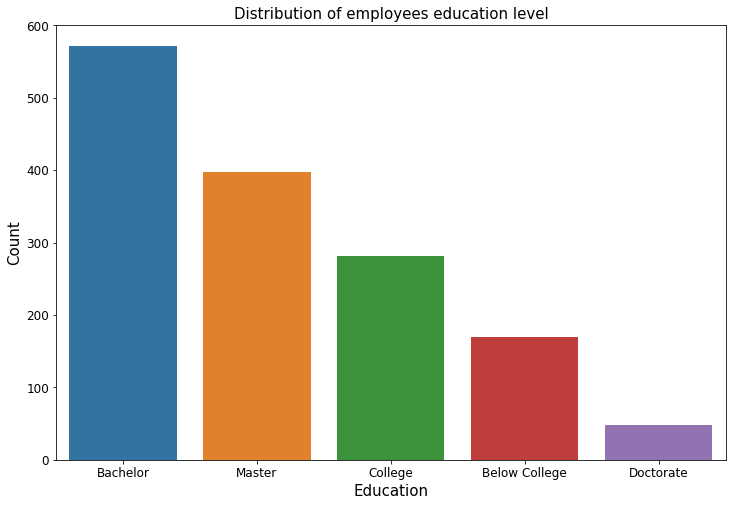

In [9]:
figure(figsize = (12,8))
plt.xlabel('Education', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Distribution of employees education level',fontsize = 15)
sns.barplot(x = 'Education' , y= 'Count', data = df4)

Ranking of employees education level:
1. Bachelor's degree(572)
2. Master's degree(398)
3. College's degree(282)
4. Bellow College(170)
5. Doctorate's degree(48)

This means working at IBM most likely you need a Bachelor's degree or above with some exception of College's degree or below college.

## Question 5: Comparison between different marital status of employees

In [10]:
dfc = df['MaritalStatus'].value_counts().reset_index()

dfc.columns = ['Marital Status','Count']

df6 = dfc.replace (({'Marital Status':{1:'Married', 2:'Single',0:'Divorced'}}))

df6

,Marital Status,Count
0,Married,673
1,Single,470
2,Divorced,327


<AxesSubplot:title={'center':'Distribution of employees education level'}, xlabel='Marital Status', ylabel='Count'>

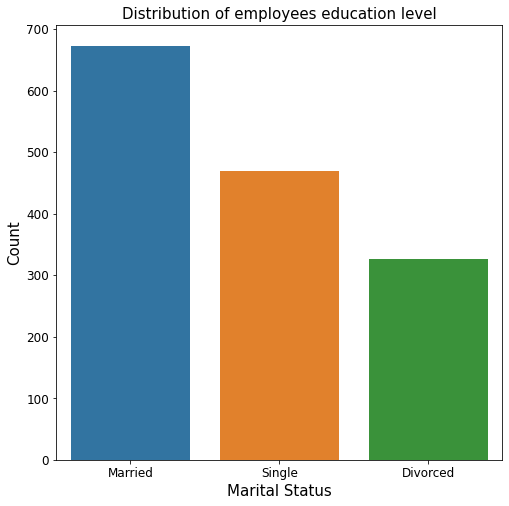

In [11]:
figure(figsize = (8,8))
plt.xlabel('Education', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Distribution of employees education level',fontsize = 15)
sns.barplot(x = 'Marital Status', y= 'Count', data = df6)

## Question 6: Build a logistic regression model which employees are likely to attrite

### Features

In [12]:
x = df.drop(['Attrition'], axis = 1)

y = df['Attrition']

### Cross validation using train test split

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### Apply logistic regression model to predict the outcome

In [14]:
logreg = LogisticRegression().fit(X_train,y_train)

y_pred = logreg.predict(X_test)

probs = logreg.predict_proba(X_test)

print(y_test.values[0:30],'\n',y_pred[0:30])

[0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0] 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


C:\Users\Tuong P\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Accuracy score between the predict and test model

In [15]:
print(metrics.accuracy_score(y_test,y_pred))
print (metrics.roc_auc_score(y_test, probs[:, 1]))

0.8435374149659864
0.7281093569503273


### Confusion matrix and classification report

In [16]:
print (metrics.confusion_matrix(y_test, y_pred))
print (metrics.classification_report(y_test, y_pred))

[[371   0]
 [ 69   1]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       1.00      0.01      0.03        70

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441



In [17]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

### Summary from training the dataset

According to medium, confusion matrix is better use in an imbalanced datasets. Here we have 1233 numbers of employees that have not left and 237 employees that left. Therefore, using confusion matrix gives better explanation where the model predict wrong at than accuracy score which is just an overview of the right predictions.

As you can see above there is only 1 sample that detect as negative(employees left) and 0 mistaken sample that detect negative as positive(employees not left) which give a precision score of 100% but on the real comparison it only detect 1 employee that left out of 237 employees that actually left. Looking at accuracy score we can only know that the model is good at predicting the overall outcome for both employees that left and not left. However, confusion matrix shows where the actual flaws at, in this case the model perform poorly at predicting the outcome of actual employees that left( only 1 out of 237). This is why confusion matrix is really important in most cases than accuracy score for classification problems.


Source:https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5

## Evenly distribute between the number of employees that left vs not left

In [18]:
n = df['Attrition'].value_counts().min()

df7 =df.groupby('Attrition').head(n)

df7

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,1,2,4,2,5993,8,1,6
1,49,0,1,8,1,1,3,2,1,5130,1,3,10
2,37,1,1,2,2,4,4,3,2,2090,6,3,0
3,33,0,1,3,4,1,4,3,1,2909,1,3,8
4,27,0,1,2,1,3,1,2,1,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,1,2,9,3,2,4,1,1,1790,1,2,1
1442,29,1,1,1,4,3,1,4,1,4787,9,4,2
1444,56,1,1,7,2,5,4,3,1,2339,8,1,10
1452,50,1,2,1,4,1,2,3,0,6728,7,3,6


### New features

In [20]:
x_model1 = df7.drop(['Attrition'],axis = 1)

y_model1 = df7['Attrition']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x_model1, y_model1, test_size=0.2, random_state=42)

In [53]:
logreg_model1 = LogisticRegression().fit(X_train,y_train)

y_pred_model1 = logreg_model1.predict(X_test)

print(y_test.values[0:30],'\n',y_pred_model1[0:30])

[1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1] 
 [1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0]


C:\Users\Tuong P\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
print(metrics.accuracy_score(y_test,y_pred_model1))

0.631578947368421


In [52]:
print (metrics.confusion_matrix(y_test, y_pred_model1))
print (metrics.classification_report(y_test, y_pred_model1))

[[28 18]
 [17 32]]
              precision    recall  f1-score   support

           0       0.62      0.61      0.62        46
           1       0.64      0.65      0.65        49

    accuracy                           0.63        95
   macro avg       0.63      0.63      0.63        95
weighted avg       0.63      0.63      0.63        95



This model with evenly distribute features has significantly increases the recall for detecting employee that left(1) but reduce precision score to 64% which is what we looking for because it has detect 32 employees that left even though it perform worse at detecting employees that has not left. However, we still want to look for higher recall and accuracy score as it is still barely a coinflip to predict the employees that left so this dataset is not highly recommend to use for predicting